In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("Zomato-data-.csv")
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [ ]:
df.dtypes

,0
name,object
online_order,object
book_table,object
rate,object
votes,int64
approx_cost(for two people),int64
listed_in(type),object


In [ ]:
#df['rate']= df['rate'].str.replace("/",'')
df['rate'] = df['rate'].str.extract('(\d+\.\d+)').astype(float)

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-279727214.py:2: SyntaxWarning: invalid escape sequence '\d'
  df['rate'] = df['rate'].str.extract('(\d+\.\d+)').astype(float)


In [ ]:
# #df['rate']=df['rate'].apply(handleRate)
# def handleRate(value):
#   value=str(value).split('/')
#   value=value[0];
#   return float(value)
# df['rate']=df['rate'].apply(handleRate)
# (df.head())

In [ ]:
df.dtypes

,0
name,object
online_order,object
book_table,object
rate,float64
votes,int64
approx_cost(for two people),int64
listed_in(type),object


In [ ]:
df.isnull().sum()

,0
name,0
online_order,0
book_table,0
rate,0
votes,0
approx_cost(for two people),0
listed_in(type),0


/tmp/ipython-input-1353398983.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['listed_in(type)'], palette="pastel")


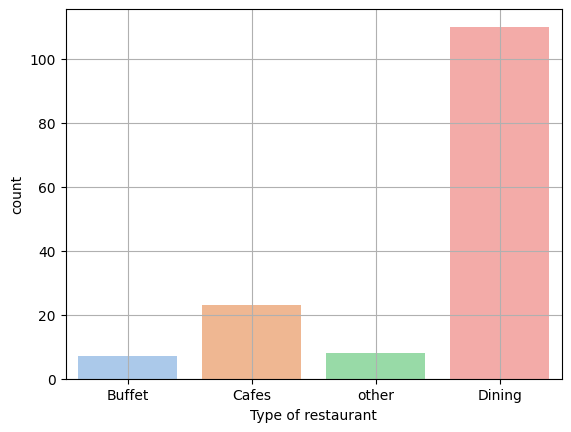

In [ ]:
sns.countplot(x=df['listed_in(type)'], palette="pastel")
plt.xlabel("Type of restaurant")
plt.grid(True)


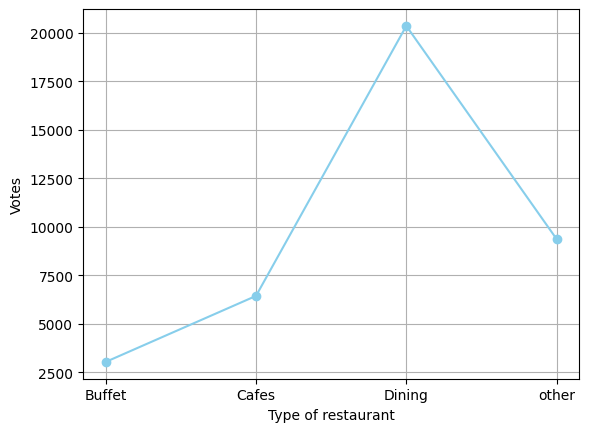

In [ ]:
grouped_data = df.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': grouped_data})

plt.plot(result, c='skyblue', marker='o')
plt.xlabel('Type of restaurant')
plt.ylabel('Votes')
plt.grid(True)
plt.show()

In [ ]:
result

,votes
listed_in(type),
Buffet,3028
Cafes,6434
Dining,20363
other,9367


In [ ]:
max_votes = df['votes'].max()
min_votes = df['votes'].min()
#print(max_votes)
#print(min_votes)
restaurant_with_max_votes = df.loc[df['votes'] == max_votes, 'name']

print('Restaurant(s) with the maximum votes:')
print(restaurant_with_max_votes)


Restaurant(s) with the maximum votes:
38    Empire Restaurant
Name: name, dtype: object


/tmp/ipython-input-1884138345.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['online_order'], palette="pastel")


Text(0.5, 0, 'Online order')

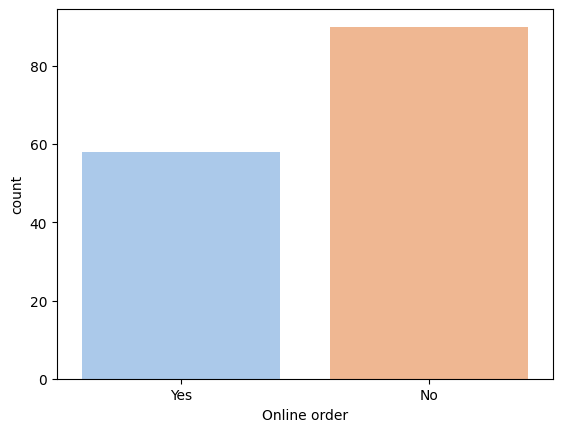

In [ ]:
sns.countplot(x=df['online_order'], palette="pastel")
plt.xlabel("Online order")

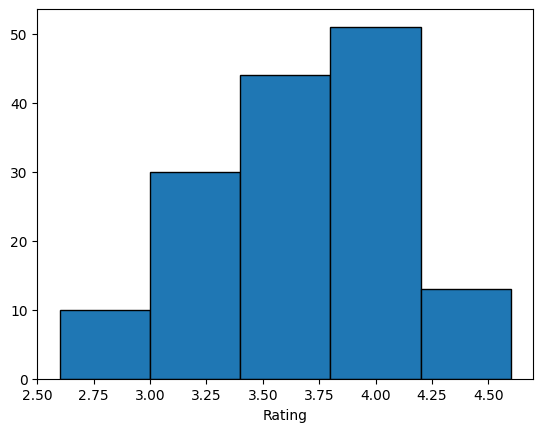

In [ ]:
#Step 7: Analyze Ratings
plt.hist(df['rate'],bins=5,edgecolor='black')
plt.xlabel('Rating')
plt.show()

/tmp/ipython-input-4175801789.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['approx_cost(for two people)'], palette="pastel")


<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

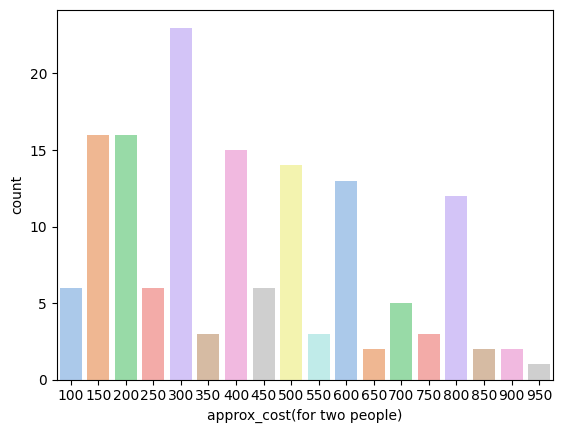

In [ ]:
#Step 8: Approximate Cost for Couples
#couple_data = df['approx_cost(for two people)']
sns.countplot(x=df['approx_cost(for two people)'], palette="pastel")


/tmp/ipython-input-915705510.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='online_order', y='rate',data=df, palette="pastel")


<Axes: xlabel='online_order', ylabel='rate'>

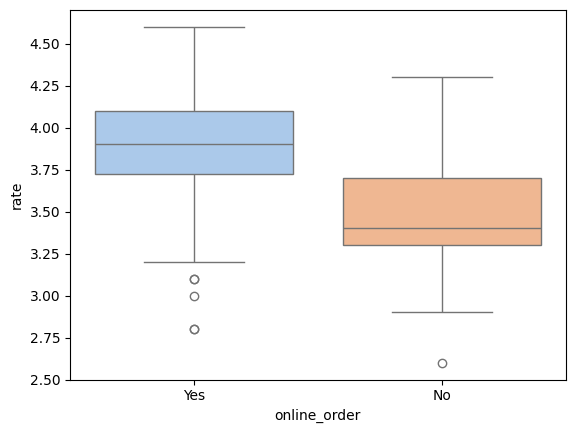

In [ ]:
#Step 9: Ratings Comparison - Online vs Offline Orders
sns.boxplot(x='online_order', y='rate',data=df, palette="pastel")

In [ ]:
plt.figure(figsize = (6,6))
sns.boxplot(x = 'online_order', y = 'rate', data = df)

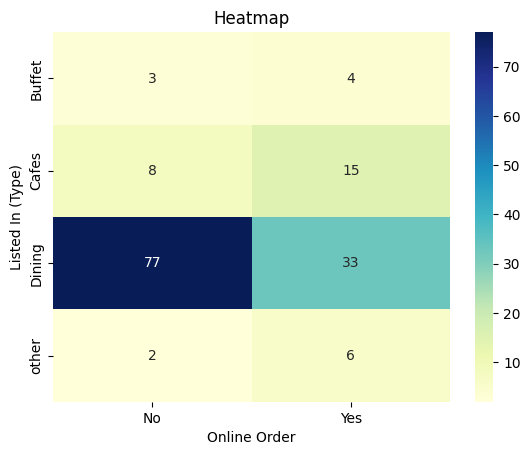

In [ ]:
#Step 10: Order Mode Preferences by Restaurant Type
pivot_table = df.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size',
fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Heatmap')
plt.xlabel('Online Order')
plt.ylabel('Listed In (Type)')
plt.show()